# Aggregations: min, max and Everything in Between

## Summing the Values in an Array

In [2]:
import numpy as np
rng = np.random.default_rng()

In [3]:
L = rng.random(100)
print(L[:10])
sum(L)

[0.87090866 0.25487264 0.22658598 0.35055756 0.55919989 0.19740636
 0.72397532 0.62032556 0.79429509 0.4464762 ]


43.14121608177823

In [4]:
# using numpy aggregations
np.sum(L)

43.141216081778225

In [5]:
# Faster becuase it executes the operation in compiled code
big_array = rng.random(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

58.6 ms ± 2.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
287 µs ± 15.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


#### **Warning**
sum and np.sum are not identical <br>
Optional arguments have differnt meanings <br>
sum(x, 1) initializes the sum at 1, while <br>
np.sum(x, 1) sums along axis 1, and np.sum is aware of multiple dimensions

## Minimum and Maximum

In [6]:
min(big_array), max(big_array)

(1.3562277478840201e-06, 0.9999995585629549)

In [7]:
%timeit min(big_array)
%timeit np.min(big_array)

40.2 ms ± 1.53 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
198 µs ± 11.9 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [8]:
# shorter syntax is to use the mothods of the array object itself:
print(big_array.min(), big_array.max(), big_array.sum())

# Whenever possible, make sure you are using the NumPy version of these aggregates 
# when operating on NumPy arrays

1.3562277478840201e-06 0.9999995585629549 500206.1480994317


In [9]:
M = rng.integers(0, 10, (3, 4))
print(M)

[[5 9 4 6]
 [1 0 0 5]
 [3 8 9 9]]


In [10]:
# Aggregate across all elements of the array
M.sum()

59

In [11]:
# Minimum value in each column
M.min(axis=0)

array([1, 0, 0, 5])

In [12]:
# Maxiumum value in each row
M.max(axis=1)

array([9, 5, 9])

#### **Note** 
axis specifies which axis will be collapsed not which axis will be returned

### Other Aggregation Functions

Many have NaN-safe counterpartss that ignore the missing values


|**Aggregation**|**Function**|**Nan-Safe** |
|:--------------|:----------:|:-----------:|
|**SUM**        |np.sum      |np.nansum    |
|**PRODUCT**    |np.prod     |np.nanprod   |
|**MEAN**       |np.mean     |np.nanmean   |
|**STD DEV**    |np.std      |np.nanstd    |
|**VARIANCE**   |np.var      |np.nanvar    |
|**VARIANCE**   |np.min      |np.nanmin    |
|**MAXIMUM**    |np.max      |np.nanmax    |
|**Index of MIN**|np.argmin  |np.nanargmin |
|**Index of MAX**|np.argmax  |np.nanargmax |
|**MEDIAN**     |np.median   |np.nanmedian |
|**PERCENTILES**|np.percentile|np.nanpercentile|
|**ANY TRUE**   |np.any      |N/A          |
|**ALL TRUE**.  |np.all      |N/A          |

### Example: What is the Average Height of US Presidents?

In [13]:
!head -4 data/president_heights.csv

order,name,height(cm)
1,George Washington,189
2,John Adams,170
3,Thomas Jefferson,189


In [18]:
# Pandas package will be explored more in Part III
import pandas as pd
data = pd.read_csv('data/president_heights.csv')
data.head()

,order,name,height(cm)
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163
4,5,James Monroe,183


In [19]:
heights = np.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185 191 182]


In [20]:
print("Mean height:      ", heights.mean())
print("Std Dev:          ", heights.std())
print("Min height:       ", heights.min())
print("Max height:       ", heights.max())

Mean height:       180.04545454545453
Std Dev:           6.983599441335736
Min height:        163
Max height:        193


In [23]:
print("25th Percentile:      ", np.percentile(heights, 25))
print("Median:               ", np.percentile(heights, 50))   
print("75th Percentile:      ", np.percentile(heights, 75))

25th Percentile:       174.75
Median:                182.0
75th Percentile:       183.5


In [25]:
# Using Matplotlib (more on that in Part IV)

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

/var/folders/9l/vy9cjvrs5qn5_8x2fs6ktq5m0000gn/T/ipykernel_71787/2416352193.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


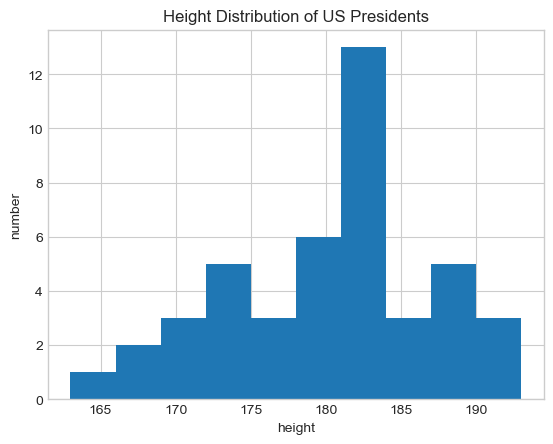

In [30]:
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height')
plt.ylabel('number');